In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Reading the Air Quality data
df=pd.read_csv('Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [124]:
df.isnull().sum()  #Checkany null values in data

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [3]:
#We have one null so i am dropping the that null value
df=df.dropna()

In [4]:
df.describe() #Summerization of data

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,25.572329,32.249726,19.285068,1008.180000,64.097260,1.892329,6.632877,15.702877,107.929150
std,7.279810,6.840215,7.452854,7.556041,15.438985,0.686832,3.969204,7.657372,82.576607
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,18.900000,27.600000,12.025000,1001.300000,55.000000,1.400000,3.500000,11.100000,43.583333
50%,27.700000,34.100000,21.000000,1008.450000,66.000000,1.900000,6.300000,14.800000,81.729167
75%,31.200000,36.900000,25.900000,1015.000000,75.000000,2.400000,9.100000,18.300000,153.934375
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


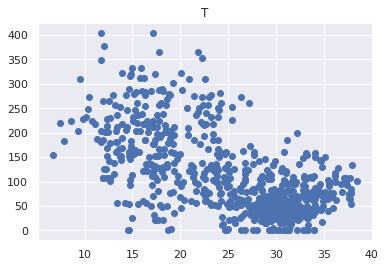

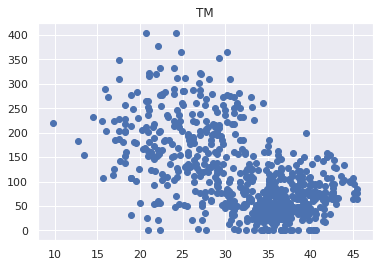

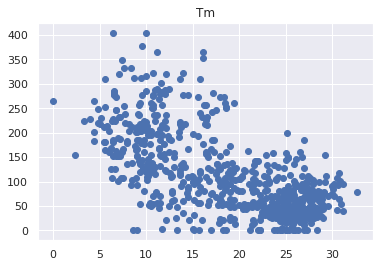

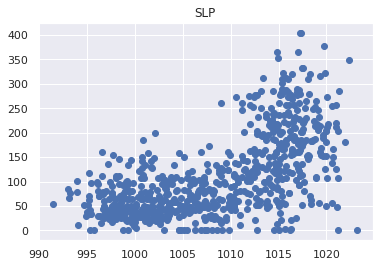

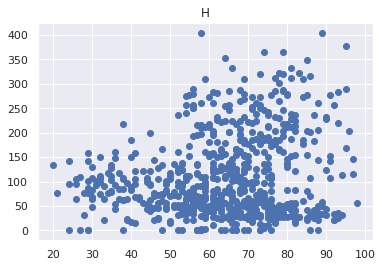

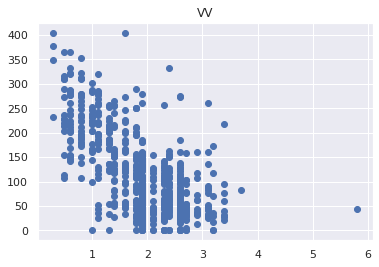

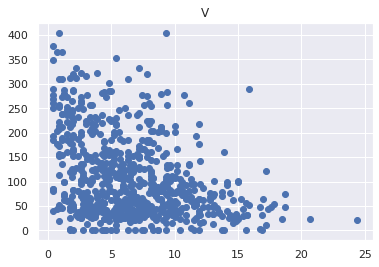

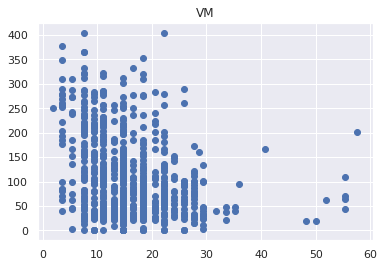

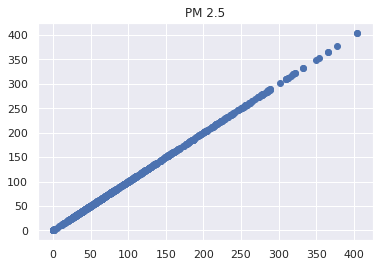

In [127]:
#Finding the relationships of data
for feature in df:
    data=df.copy()
    plt.scatter(data[feature],data['PM 2.5'])
    plt.title(feature)
    plt.show()

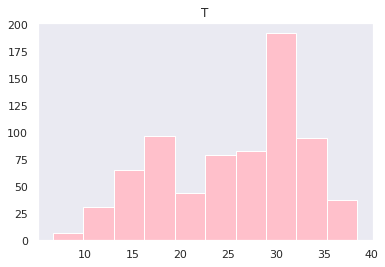

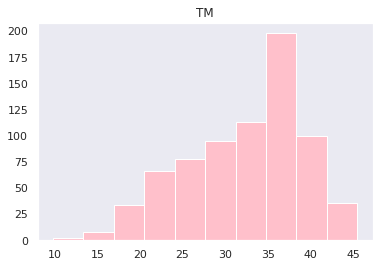

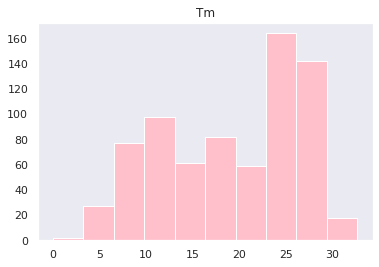

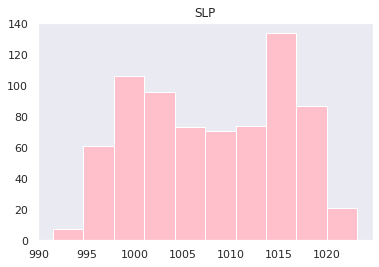

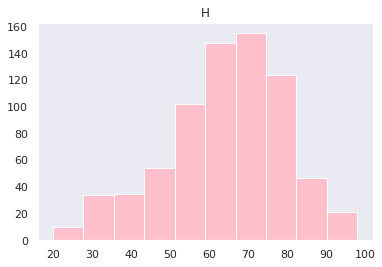

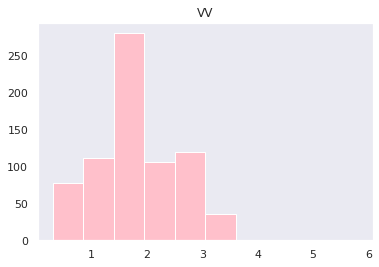

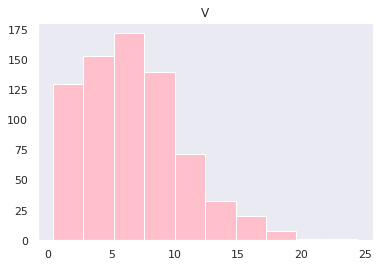

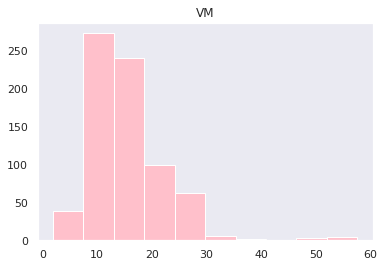

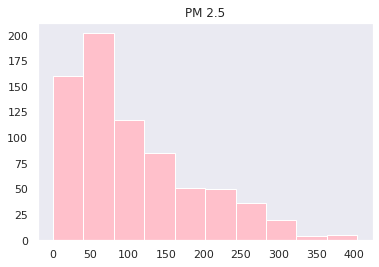

In [128]:
#Let see how our data is distributed 
for feature in df:
        data=df.copy()
        data[feature].hist(grid=False,color='pink')
        plt.title(feature)
        plt.show()

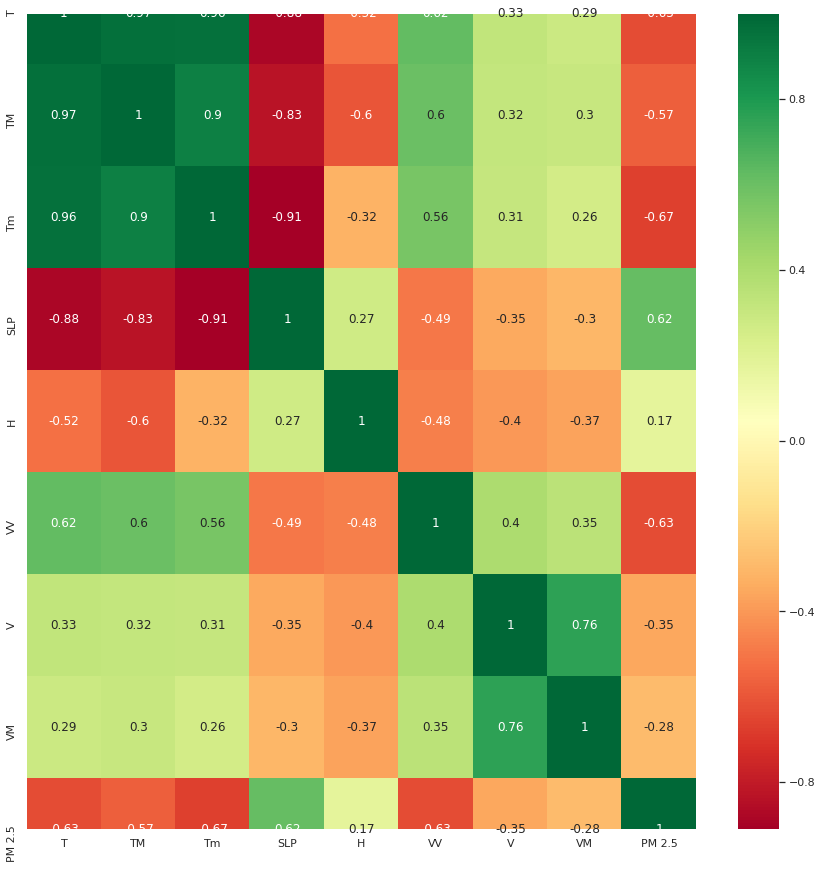

In [129]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [130]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


In [5]:
#Creat X and Y
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features


In [6]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
lm=LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-190.4721207703305
[ 2.18067622e+00  2.08889987e-01 -6.64702238e+00  5.31640302e-01
 -9.00411218e-01 -5.21603278e+01 -2.26097705e+00 -3.09509010e-02]


In [134]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

/home/stellapps/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [135]:
print(model.feature_importances_)

[0.19834856 0.06060006 0.19183062 0.11314745 0.08019154 0.27135722
 0.04602274 0.03850181]


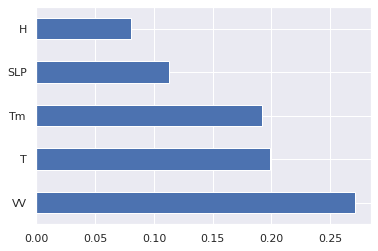

In [136]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [7]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [9]:
lr.fit(X_train,y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lr.score(X_train,y_train) #Training Score

0.6007706404750855

In [11]:
lr.score(X_test,y_test)  #Testing Score

0.5316188612878152

Test Score is less than the train score ,
Let's check any overfitting in data

In [12]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [13]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.04115849433237686

In [14]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.04115849433237686, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
lasso_reg.score(X_test, y_test)

0.5316251942172354

Test score is same even after and before the overfitting of model

In [16]:
ridgecv = RidgeCV(alphas=(0.1, 1.0, 10.0),
    fit_intercept=True,
    normalize=False,
    scoring=None,
    cv=None,
    gcv_mode=None,
    store_cv_values=False,)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [17]:
ridgecv.alpha_

1.0

In [18]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
ridge_model.score(X_test, y_test)

0.5314406117659285

In [27]:
prediction=lr.predict(X_test)

In [28]:


from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)
score.mean()


0.46724362258523333

In [29]:
lr.coef_   #Slope Indicates the where intersect an axxis

array([ 2.63949039e+00,  5.19978529e-01, -7.59811846e+00,  4.93219944e-01,
       -8.37064222e-01, -5.04301355e+01, -2.75417778e+00, -3.92662839e-02])

In [30]:
lr.intercept_  #intercept indicates the stippness of the line

-157.37425475061315

# Model Evaluation

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 40.28335537132943
MSE: 3057.6641286741387
RMSE: 55.296149311449696


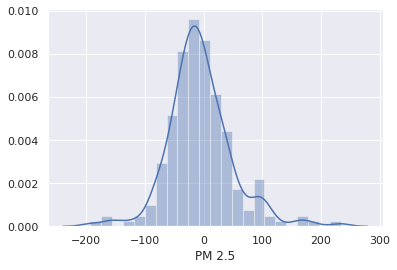

In [32]:
prediction=lr.predict(X_test)
sns.distplot(y_test-prediction)

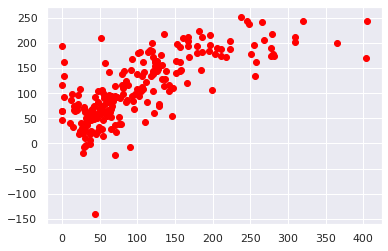

In [33]:
plt.scatter(y_test,prediction,color='red')
# first, plot the observed data


In [56]:
r2_score(y_test,prediction)

0.5316188612878152

In [35]:
#Final output file
predictions=pd.DataFrame(prediction,columns = ['Predicted_output'])
predictions.head()

,Predicted_output
0,189.332038
1,242.249617
2,244.470361
3,92.255655
4,127.853141


In [36]:
#Mean of predicted output
predictions.mean()

Predicted_output    108.694894
dtype: float64

In [156]:
import pickle
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

/home/stellapps/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
RF.score(X_train,y_train)   #Training Score

0.920056424841701

In [39]:
RF.score(X_test,y_test)   #Training Score

0.6370502909607737

Training dataset learn well and and we have score high, but in case of Test data we have an very less score ,
this is to Overfitting condition,let me eliminate this problem using cross validation 

In [40]:
predict=RF.predict(X_test)
predict

array([155.91      , 237.2375    , 255.81375   , 108.55125   ,
       147.5375    ,  42.62916667,  36.00833333, 219.37916667,
        49.1       , 190.125     , 105.39166667, 134.92083333,
        93.17916667, 295.05833333, 217.88083333, 203.69208333,
        89.44166667,  51.82083333, 172.58958333,  62.875     ,
        78.5625    , 191.68083333,  28.59583333, 201.74583333,
       210.90166667,  71.20416667,  89.67916667,  95.67916667,
        86.52916667,  74.99583333, 180.82791667,  53.725     ,
        67.72083333, 113.92583333, 181.3875    , 115.4875    ,
       180.83041667, 275.13041667,  72.375     , 151.02916667,
        46.87083333, 178.85125   ,  79.92083333, 132.95833333,
        93.10833333,  76.43333333, 180.52625   ,  80.94166667,
        49.39166667,  55.85833333, 121.72916667, 181.41708333,
        25.3       , 219.79166667,  94.81666667,  75.69166667,
       129.64583333,  41.55416667,  69.14166667, 171.78666667,
        40.75      ,  78.175     ,  42.61666667,  56.02

In [41]:
predict.mean()

108.29459665144594

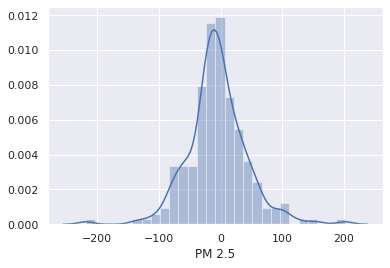

In [43]:
sns.distplot(y_test-predict)

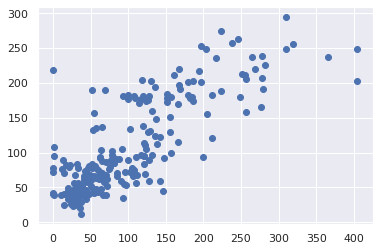

In [53]:
plt.scatter(y_test,predict)
plt.show()

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))


MAE: 35.063203957382036
MSE: 2369.391536331494
RMSE: 48.67639609021496


In [55]:
r2_score(y_test,predict)    

0.6370502909607737

# Model Tuning

In [58]:
#Cross validation will solve a overfitting problem and gives a optimized model accuracy
from sklearn.model_selection import cross_val_score
cv=cross_val_score(RF,X,y,cv=5)
cv

array([0.49607427, 0.40516286, 0.57567089, 0.58146372, 0.36557169])

In [59]:
cv.mean()

0.4847886857448399

In [61]:
from sklearn.model_selection import RandomizedSearchCV


In [63]:
# Number of trees in random forest
n_estimators = [100,200,300,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1,2,4,3,5]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 4, 3, 5], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [65]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=500, min_samples_split=5, min

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=4 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, total=   0.2s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=4 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=4, total=   0.4s
[CV] n_estimators=200, min_samples_split=100, min_samples

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4, total=   0.2s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=1 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=1, total=   0.6s
[CV] n_estimators=300, min_samples_split=10, min_samples_le

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=3, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=3 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=3, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=3 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=3, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=3 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=3, total=   0.5s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=500, min_samples_split=2, m

[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1, total=   0.9s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1, total=   0.9s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1, total=   0.9s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1, total=   0.9s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=2 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=2, total=   0.5s
[CV] n_estimators=300, min_samples_split=10, 

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=3 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=3 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=3, total=   0.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=3 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=3 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=4, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=4, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=4, total=   0.6s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=4, total=   0.5s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=4, total=   0.5s
[CV] n_estimators=200, min_samples_split=15, min_samples_

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=2, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=2 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=2, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=2 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=2, total=   1.0s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_sam

[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=1, total=   0.4s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=1 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=1, total=   0.4s
[CV] n_estimators=200, min_samples_split=15, mi

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   0.2s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1, total=   0.4s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=200, min_samples_split=100, mi

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=4, total=   0.5s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=1 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=1, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=1 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=1, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_sam

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  4.8min finished
/home/stellapps/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...o

In [73]:
rf_random.score(X_train,y_train)

-1368.4227988534547

In [74]:
rf_random.score(X_test,y_test)

-2401.3229957061035

In [67]:
prediction_after_tuning=rf_random.predict(X_test)

In [68]:
prediction_after_tuning.mean()

109.92132917149091

In [69]:
r2_score(y_test,prediction_after_tuning)

0.6321589449288907

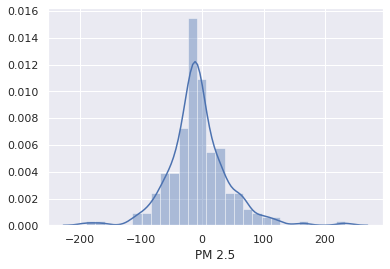

In [70]:
sns.distplot(y_test-prediction_after_tuning)

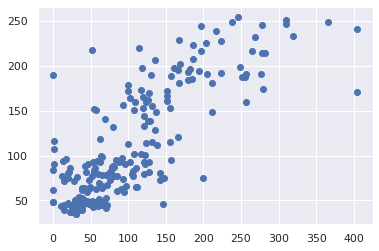

In [72]:
plt.scatter(y_test,prediction_after_tuning)

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_after_tuning))
print('MSE:', metrics.mean_squared_error(y_test, prediction_after_tuning))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_after_tuning)))


MAE: 35.02342036142612
MSE: 2401.3229957061035
RMSE: 49.003295763714746
